# **TECH CHALLENGE - 3IADT**
## **Autores**
----
### **Paulo Sergio Pereira França Junior**
#### RM 358391
----
### **Yan Gabriel Ventura Figueiredo**
#### RM 358678
----

# **INTRODUÇÃO**

Diante da crescente necessidade de otimização na análise de dados, uma empresa do setor de saúde contratou um grupo de especialistas para o desenvolvimento de um modelo preditivo de regressão. O objetivo deste projeto é prever os custos médicos individuais cobrados pelo seguro de saúde, fornecendo insights valiosos para a tomada de decisões mais precisas e eficientes na gestão dos planos de cobertura.

Para a execução deste projeto, foi disponibilizada a base de dados a seguir:

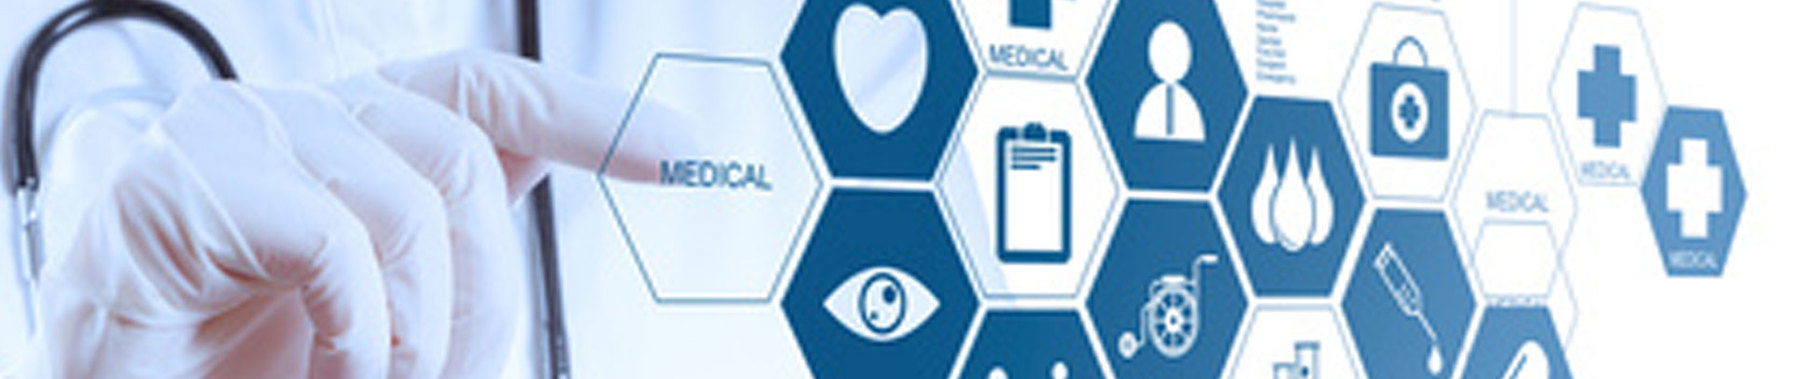

In [11]:
import pandas as pd
insurance_data = pd.read_csv('datasets/insurance.csv')
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Esta base de dados é composta por sete colunas, conforme descritas abaixo:

**Age:** Idade do cliente;

**Sex:** Sexo do cliente;

**BMI:** Índice de Massa Corporal (IMC) do cliente;

**Children:** Quantidade de filhos do cliente;

**Smoker:** Indica se o cliente é fumante ou não;

**Region:** Região geográfica de residência do cliente;

**Charges:** Valor do custo do seguro de saúde para o cliente.

# **FLUXO DO DESENVOLVIMENTO**

Para a construção do modelo preditivo, o seguinte fluxo de trabalho será adotado:

**Exploração de Dados -> Pré-Processamento de Dados -> Modelagem -> Treinamento e Avaliação do Modelo -> Validações Estatísticas**

# **EXPLORAÇÃO DOS DADOS**

Inicialmente, é necessário realizar uma análise exploratória dos dados, incluindo a avaliação de estatísticas descritivas e a visualização das distribuições. Esse processo permitirá identificar as variáveis mais relevantes para o desenvolvimento do modelo.

No entanto, todas as colunas serão consideradas importantes em um primeiro momento. Durante o Pré-Processamento de Dados, variáveis poderão ser descartadas caso se revelem irrelevantes ou redundantes para a construção do modelo preditivo.

Com isso em mente, a seguir serão exibidos as principais informações do Data Set:

In [12]:
print(insurance_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


A função `info()` fornece um resumo das características do *data set*, incluindo:

- **1338 registros** e **7 colunas**;
- Presença de três variáveis categóricas: **sex** (sexo), **smoker** (se o cliente é fumante) e **region** (região geográfica);
- Não há valores nulos em nenhuma das colunas, o que evita a necessidade de tratamento de valores ausentes.

In [13]:
print(insurance_data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


A função `describe()` apresenta estatísticas descritivas das variáveis numéricas, fornecendo insights como:

- **Age**: Idade média dos clientes é 39 anos, com uma distribuição entre 18 e 64 anos;
- **BMI**: O Índice de Massa Corporal (IMC) médio é 30.66, variando de 15.96 a 53.13, indicando possíveis outliers ou casos de obesidade;
- **Children**: A maioria dos clientes possui até 2 filhos, com uma média de 1.09 filhos;
- **Charges**: Os custos do seguro variam amplamente, com uma média de 13.270 e um valor máximo de 63.770, sugerindo a presença de outliers que podem estar associados a clientes com características específicas, como fumantes.

Essas análises iniciais ajudam a identificar padrões, correlações entre variáveis e potenciais outliers que podem influenciar os resultados do modelo preditivo.

## **Matriz de Correlação**
Uma matriz de correlação é uma ferramenta estatística que permite analisar a força e a direção das relações entre variáveis numéricas de um conjunto de dados.

Ela organiza os coeficientes de correlação de Pearson em uma tabela, facilitando a interpretação de associações significativas entre as variáveis.

O coeficiente de Pearson varia de -1 a 1, onde valores próximos de 1 indicam uma forte correlação positiva (quando uma variável aumenta, a outra também tende a aumentar), e valores próximos de -1 indicam uma forte correlação negativa (quando uma variável aumenta, a outra tende a diminuir).

Essa análise ajuda a identificar padrões importantes e a selecionar as variáveis mais relevantes para o desenvolvimento do modelo preditivo.

Para calcular e visualizar a matriz de correlação nesta base de dados, é possível utilizar o seguinte código:



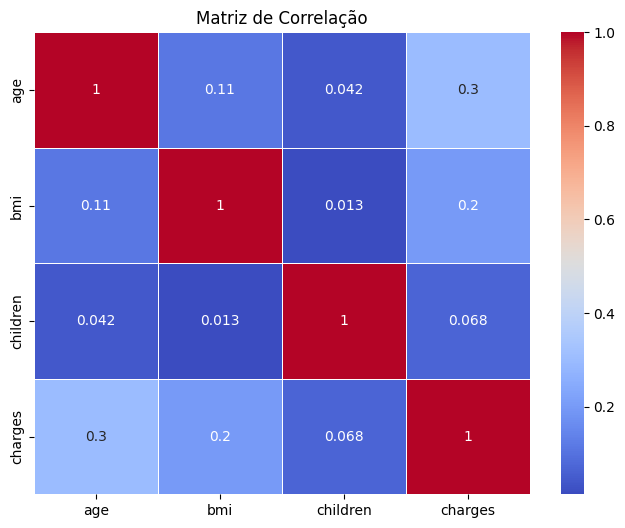

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar apenas as colunas numéricas para gerar a matriz de correlação
insurance_data_numeric = insurance_data.select_dtypes(include=['float64', 'int64'])

# Gerar a matriz de correlação
correlation_matrix = insurance_data_numeric.corr()

# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Com base nessa matriz de correlação, é possível ter insights como:

1. **Idade e Custos do Seguro**: Uma correlação positiva entre **age** (idade) e **charges** (custos do seguro) sugere que, à medida que os clientes envelhecem, o custo do seguro tende a aumentar. Isso reflete o risco crescente de problemas de saúde em idades mais avançadas, o que influencia diretamente o valor cobrado.

2. **BMI e Custos do Seguro**: Uma correlação positiva entre **bmi** (Índice de Massa Corporal) e **charges**, indica que clientes com maior IMC enfrentam custos mais altos de seguro, devido ao aumento do risco de condições de saúde relacionadas ao peso, como diabetes e doenças cardíacas.

3. **Número de Filhos e Custos**: A coluna **children** (número de filhos) apresenta uma correlação mais fraca com **charges**, indicando que o número de dependentes pode ter uma influência limitada sobre os custos do seguro, mas ainda pode ser relevante dependendo da política de cada seguradora.

4. **Idade e BMI**: A correlação entre **age** e **bmi** é baixa, sugerindo que a idade dos clientes e o IMC não estão fortemente relacionados, indicando uma diversidade no perfil de saúde entre diferentes faixas etárias.

Esses insights ajudam a identificar as variáveis que têm maior impacto nos custos do seguro, orientando as próximas etapas no desenvolvimento do modelo preditivo.


## **Visualização de Outliers**
A análise de outliers é uma etapa fundamental na exploração e pré-processamento de dados, pois esses valores extremos podem influenciar negativamente o desempenho dos modelos preditivos, especialmente em métodos baseados em regressão.

Outliers representam dados atípicos que se desviam substancialmente do padrão da amostra e podem surgir por erros de coleta ou devido a fenômenos naturais que afetam as variáveis analisadas.

Para identificar a presença de outliers na variável charges, utilizamos um boxplot, que é uma representação gráfica eficiente para visualizar a distribuição dos dados e destacar valores atípicos.

Abaixo, é aplicado esse método ao conjunto de dados:

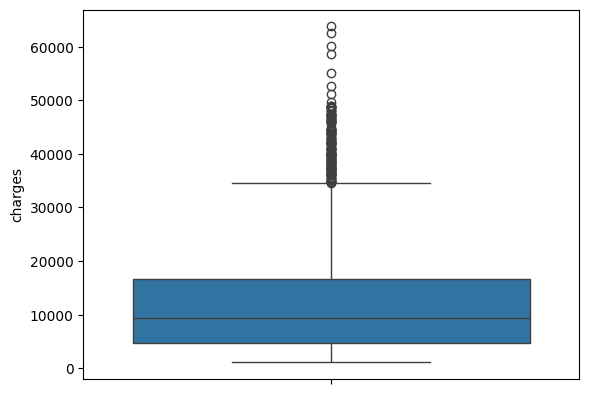

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para verificar a presença de outliers em 'charges'
sns.boxplot(insurance_data['charges'])
plt.show()

Este boxplot revela que a coluna `charges` apresenta uma distribuição com vários outliers, principalmente em valores mais altos. Esses outliers indicam que alguns indivíduos no conjunto de dados têm custos de seguro substancialmente maiores que a maioria dos outros.

Além disso, é possível ter insights como:

1. **Distribuição assimétrica:** A presença de valores extremos na faixa superior sugere uma distribuição assimétrica, possivelmente relacionada a variáveis específicas (como idade, hábito de fumar ou IMC elevado).
2. **Impacto nos modelos de regressão:** Esses outliers podem influenciar negativamente a performance de modelos de regressão linear simples, introduzindo um viés e aumentando o erro médio quadrático (MSE) do modelo.
3. **Possíveis categorias de análise:** Dados os valores extremos, pode ser interessante analisar em detalhes quem são os indivíduos que possuem esses custos altos. Se estiverem associados, por exemplo, ao status de fumante, isso justificaria um modelo que trate essas variáveis de forma não linear ou com segmentação específica.

Esses pontos indicam que técnicas de regularização, transformação ou, em casos específicos, a remoção desses outliers podem ser consideradas para melhorar a robustez do modelo.


# **PRÉ-PROCESSAMENTO DE DADOS**

A partir dessa exploração de dados, é possível identificar alguns pontos que merecem atenção, cujos quais serão abordados a seguir:




## **Tratamento de Valores Nulos**

O primeiro aspecto a ser tratado são os valores nulos presentes no conjunto de dados. Esses valores podem comprometer a precisão dos resultados ao introduzir vieses indesejados.


Para mitigar esse risco, será necessário remover os registros que contêm valores nulos da amostra, conforme descrito abaixo:

In [16]:
insurance_data_cleaned = insurance_data.dropna()

## **Tratamento de Valores Textuais**

Outro desafio comum no desenvolvimento de modelos preditivos é a presença de valores textuais (categóricos).

Esses valores podem impactar diretamente os cálculos realizados pelos algoritmos, uma vez que dados textuais não podem ser processados diretamente por métodos matemáticos.

Para contornar esse problema, é necessário transformar os valores categóricos em valores numéricos.

Uma das técnicas mais eficazes para essa conversão é o One-Hot Encoding, que cria uma nova coluna para cada categoria presente no dado original.

Nessas novas colunas, são atribuídos os valores "1" ou "0" para indicar a presença ou ausência de determinada categoria em cada registro, permitindo que os algoritmos tratem essas informações adequadamente.

Essa técnica pode ser implementada da seguinte forma:


In [17]:
insurance_data_encoded = pd.get_dummies(insurance_data_cleaned, columns=['sex', 'smoker', 'region'], drop_first=True)
insurance_data_encoded = insurance_data_encoded.astype(float)
print(insurance_data_encoded.head())

    age     bmi  children      charges  sex_male  smoker_yes  \
0  19.0  27.900       0.0  16884.92400       0.0         1.0   
1  18.0  33.770       1.0   1725.55230       1.0         0.0   
2  28.0  33.000       3.0   4449.46200       1.0         0.0   
3  33.0  22.705       0.0  21984.47061       1.0         0.0   
4  32.0  28.880       0.0   3866.85520       1.0         0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  


## **Separação de Dados para Treino e Teste**

Além disso, também é essencial separar o dataset em dois subconjuntos: treino e teste.

O conjunto de treino será utilizado para ajustar o modelo, permitindo que ele "aprenda" os padrões presentes nos dados.

Já o conjunto de teste será reservado para avaliar o desempenho do modelo, garantindo que ele generalize bem para dados que ainda não foram vistos.

### **Estratificação da Amostra com Base em Determinada Variável**

Primeiramente, é importante garantir que o conjunto de dados de treino e teste mantenha a distribuição adequada das variáveis relevantes, como a idade. Para isso, é possível usar uma técnica chamada "Estratificação".

Esse procedimento divide o *dataset* em dois conjuntos: treino (80% dos dados) e teste (20% dos dados), garantindo que a distribuição de uma determinada variável seja preservada em ambos.

A estratificação é essencial quando se lida com variáveis que podem influenciar significativamente os resultados do modelo.

Ao aplicar esse método na variável "idade", é possível evitar o risco de que certas faixas etárias fiquem desproporcionalmente representadas em um dos conjuntos, o que poderia levar a vieses durante o treinamento e a avaliação do modelo.

A seguir, está um exemplo de estratificação com base na variável idade, assegurando que as proporções de faixas etárias sejam mantidas em ambos os conjuntos de treino e teste:

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(insurance_data_encoded, insurance_data_encoded["age"]):
    strat_train_set = insurance_data_encoded.loc[train_index]
    strat_test_set = insurance_data_encoded.loc[test_index]

### **Separação das Variáveis Independentes e a Variável Dependente**

Feito a estratificação, é necessário separar a variável dependente das variáveis independentes.

Neste caso, a variável dependente que o modelo deve prever é o charges (custo do seguro). Já as variáveis independentes, que serão utilizadas como entrada para o modelo, incluem todas as outras colunas restantes após o pré-processamento realizado.

O código a seguir realiza essa separação:

In [19]:
# Para os treinos
# Variáveis independentes (X) e
X_train = strat_train_set.drop("charges", axis=1)
# Variável dependente/target (y)
y_train = strat_train_set["charges"].copy()

# Para os testes
# Variáveis independentes (X) e
X_test = strat_test_set.drop("charges", axis=1)
# Variável dependente/target (y)
y_test = strat_test_set["charges"].copy()

## **Padronização dos dados**
Por fim, a padronização de dados. Esse procedimento é uma etapa crucial no pré-processamento pois garante que as variáveis numéricas do conjunto de dados estejam na mesma escala, sendo particularmente importante para modelos de regressão, pois discrepâncias nas escalas entre variáveis podem interferir nos resultados e na convergência do modelo.

Para aplicá-lo, utiliza-se a técnica de StandardScaler, que transforma as variáveis para terem média zero e desvio padrão unitário, mantendo assim a estrutura das distribuições dos dados originais.

Após as etapas de limpeza de dados nulos, tratamento de valores textuais, estratificação e separação das variáveis independentes e dependente, conforme descrito anteriormente, o StandardScaler é aplicado para garantir uma escala consistente entre as variáveis independentes (X_train e X_test).

Abaixo, demonstramos como essa padronização é realizada:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **MODELAGEM**
Agora que os dados foram devidamente preparados, passa-se à etapa de modelagem.

O objetivo desta fase é desenvolver um modelo preditivo que seja capaz de estimar os custos médicos com base nas variáveis disponíveis.


## **Regressão Linear**

A Regressão Linear é uma técnica estatística e de aprendizado supervisionado empregada para modelar a relação entre uma variável dependente contínua (ou variável-alvo) e uma ou mais variáveis independentes (ou preditoras). Esse método assume que existe uma relação linear entre as variáveis, ou seja, que a variável dependente pode ser expressa como uma combinação linear das variáveis independentes, acrescida de um termo de erro.

Na **Regressão Linear Simples**, onde existe apenas uma variável preditora, a relação é representada pela equação:

$$
y = \alpha + \beta \cdot X + \epsilon
$$

Em que $y$ representa o valor previsto da variável dependente, $\alpha$ é o termo constante (intercepto), $\beta$ é o coeficiente da variável independente $X$, e $\epsilon$ é o termo de erro. Esse modelo traça uma linha reta que minimiza a soma dos erros quadráticos entre os valores previstos e os valores observados.

<br/>

Já na **Regressão Linear Múltipla**, o modelo incorpora múltiplas variáveis independentes para capturar de forma mais abrangente as influências sobre a variável dependente. A equação que descreve essa relação é:

$$
y = \alpha + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \ldots + \beta_n \cdot X_n + \epsilon
$$

Onde $y$ é a variável dependente, $\alpha$ é o intercepto, $\beta_1$, $\beta_2$, $\ldots$, $\beta_n$ são os coeficientes das variáveis independentes $X_1$, $X_2$, $\ldots$, $X_n$, e $\epsilon$ representa o termo de erro. Esse modelo permite representar relações mais complexas e captar melhor a influência conjunta de várias características.

<br/>

Neste projeto, será utilizada a Regressão Linear Múltipla da biblioteca scikit-learn, ajustada aos dados para prever os custos de seguro com base nas variáveis preditoras selecionadas.

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# **TREINAMENTO E AVALIAÇÃO DO MODELO**
Nesta etapa, o modelo de Regressão Linear será ajustado aos dados e submetido a testes para avaliar sua precisão. O conjunto de dados de treino será utilizado para o aprendizado dos parâmetros, enquanto o conjunto de teste permitirá validar sua capacidade preditiva.

A seguir, são apresentados os processos de treinamento, teste e avaliação, com métricas específicas para medir a eficácia do modelo.

## **Treinamento**
O treinamento do modelo é o processo em que ele aprende a partir dos dados de treino ajustados e escalados para identificar a relação entre as variáveis independentes e a variável dependente.

Neste caso, o modelo de Regressão Linear será treinado com os dados escalados (X_train_scaled), ajustando seus parâmetros para minimizar o erro na previsão dos valores de y_train, que representam os custos de seguro.

Abaixo, o código realiza o treinamento, ajustando o modelo aos dados de entrada:

In [22]:
model.fit(X_train_scaled, y_train)


LinearRegression()

## **Teste**
Após o treinamento, o modelo é submetido ao conjunto de dados de teste para avaliar sua capacidade preditiva em dados novos, não vistos anteriormente.

Nesta etapa, o modelo realiza previsões para a variável dependente y (custos de seguro) com base nos dados de teste escalados (X_test_scaled).

Esse procedimento permite medir o desempenho do modelo e identificar sua precisão na previsão dos custos.

Abaixo, o código realiza a previsão dos valores de y para o conjunto de teste.

In [23]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

[29218.85863606  3687.91553733 13782.84890853  6048.05997291
 12606.62205178  7557.89499846 10861.78424578  5277.67981638
 26545.49702019 11603.12595157  9732.05293927 12356.69640583
 13794.48752935 26836.38595145  2546.66485181 16561.06953165
 11365.04446822  8806.06379148  3211.79273694 27427.50539944
 11055.75529273 10910.41544071 34844.98693207 12595.63991893
  5078.81337328  3927.67953127  1254.84032802  4032.67846039
 37496.69021765  2723.11997401  7579.82614797  3555.87651242
 27226.333488   10017.18075191  1851.41418592  6346.3033752
  7430.63557505 10107.8234113  -1673.34200637 12516.52725526
  5582.13811748 40002.1813048  10135.0209698  32368.75654521
 32154.5189949  29857.37655164 11304.92607232  -120.40894771
 11768.85790475  3901.56040014  8902.58490071 13180.7266277
 13469.98079326   918.40048104  7563.79125866 40750.53550429
  6374.65823742  1727.0120742  25938.11775504 12110.42057823
  2172.79167018  3666.6653458   9307.1532036  23794.8776512
  5156.24678439  1628.08826

## **Gráfico de Dispersão: Valores Reais x Valores Previstos**
Um gráfico de dispersão permite visualizar o quão próximos os valores previstos estão dos valores reais.

Neste gráfico, os pontos representam pares de valores reais e previstos e a linha diagonal indica uma previsão perfeita: quanto mais próximos os pontos estiverem dessa linha, melhor a performance do modelo.

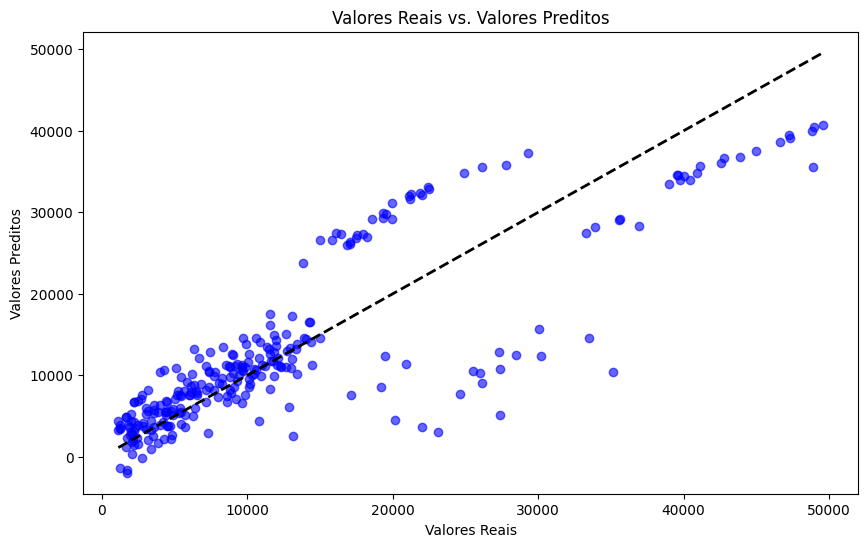

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.show()

## **Gráfico de Resíduos**
Um gráfico de resíduos é útil para verificar a distribuição dos erros de previsão (diferença entre valores reais e previstos) em função dos valores previstos.

Uma boa distribuição dos resíduos deve ser aleatória ao redor da linha zero, sem padrões evidentes, o que sugere que o modelo capturou bem a variabilidade dos dados.

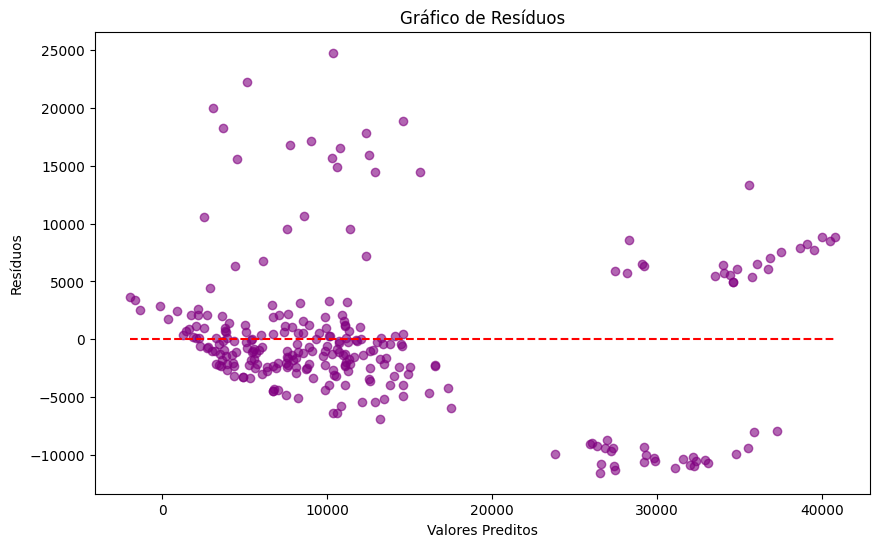

In [25]:
residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.6, color='purple')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyles='dashed')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()

## **Avaliação do Modelo**

A avaliação do modelo é uma etapa essencial para validar a precisão e a confiabilidade das previsões realizadas.

Nesta análise, utilizaremos métricas como o Erro Quadrático Médio (MSE), o Erro Médio Absoluto (MAE) e o R² Score, que fornecem diferentes perspectivas sobre o desempenho do modelo.

1. O MSE mede o erro médio dos quadrados das diferenças entre valores previstos e reais, sendo mais sensível a grandes erros;
2. O MAE calcula a média dos erros absolutos, proporcionando uma visão do erro médio em termos de valores reais;
3. O R² Score indica a proporção da variância explicada pelo modelo, variando de 0 a 1, onde valores próximos de 1 indicam melhor ajuste.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### **Erro Quadrático Médio**
O Erro Quadrático Médio é calculado para avaliar a precisão do modelo, especialmente quanto aos desvios maiores entre os valores previstos e reais.


In [27]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 39577945.058322765


Esse valor elevado sugere a presença de diferenças consideráveis entre as previsões e os valores reais de custos, indicando que o modelo ainda apresenta margem para melhoria.

### **Erro Médio Absoluto**
O Erro Médio Absoluto fornece uma métrica de fácil interpretação para o erro médio das previsões, pois apresenta o valor do erro em termos reais, sem amplificação quadrática.

In [28]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 4304.784028892648


Um MAE de 4.304,78 sugere que, em média, o modelo tem uma diferença de aproximadamente 4.300 unidades monetárias entre os valores reais e previstos dos custos de seguro.

### **R² Score**
O R² Score avalia o grau de ajuste do modelo em relação aos dados, mostrando a proporção da variação dos dados explicada pelo modelo.

In [29]:
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

R² Score: 0.7031007204351096


Um R² Score de 0,703 sugere que aproximadamente 70,3% da variância dos custos de seguro pode ser explicada pelas variáveis independentes utilizadas no modelo.

# **VALIDAÇÕES ESTATÍSTICAS**
Para garantir a robustez e a precisão do modelo de regressão linear, é fundamental realizar uma validação estatística, o que permite interpretar o impacto das variáveis preditoras sobre a variável-alvo e avaliar a qualidade do ajuste do modelo.

Utilizando as ferramentas da biblioteca statsmodels, pode-se obter uma visão mais aprofundada sobre a significância de cada variável, os coeficientes estimados e o desempenho geral do modelo.

## **Configuração do Modelo de Regressão Linear com `statsmodels`**
Para a validação estatística, o conjunto de dados de treino é preparado ao adicionar uma constante, que representa o termo de interceptação, utilizando a função add_constant() de statsmodels.

Esse procedimento garante que o modelo inclua uma interceptação, essencial para ajustar adequadamente o modelo às variáveis independentes.

Em seguida, as informações do conjunto de dados preparado são exibidas para verificação.

In [30]:
import statsmodels.api as sm

# Adicionar uma constante para o termo de interceptação
X_train_sm = sm.add_constant(X_train)
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 1218 to 1172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             1070 non-null   float64
 1   age               1070 non-null   float64
 2   bmi               1070 non-null   float64
 3   children          1070 non-null   float64
 4   sex_male          1070 non-null   float64
 5   smoker_yes        1070 non-null   float64
 6   region_northwest  1070 non-null   float64
 7   region_southeast  1070 non-null   float64
 8   region_southwest  1070 non-null   float64
dtypes: float64(9)
memory usage: 83.6 KB


## **Ajuste e Resumo Estatístico do Modelo**

Após a preparação dos dados, o modelo de Regressão Linear é ajustado utilizando a classe OLS (Ordinary Least Squares) de statsmodels, com as variáveis independentes e a variável dependente de treino.

O método `fit()` realiza o ajuste, e o método `summary()` gera um relatório estatístico abrangente do modelo.

Esse relatório inclui informações essenciais, como coeficientes estimados, valores-p para testes de hipóteses, e métricas de ajuste do modelo, como R-quadrado, fornecendo uma visão detalhada do desempenho e da validade estatística das variáveis no modelo.

In [31]:
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Resumo estatístico do modelo
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     421.5
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          3.95e-323
Time:                        01:15:00   Log-Likelihood:                -10825.
No. Observations:                1070   AIC:                         2.167e+04
Df Residuals:                    1061   BIC:                         2.171e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.157e+04   1097.424  

Este resultado da regressão OLS oferece várias informações úteis e insights sobre os fatores que influenciam a variável dependente (charges), na amostra de dados, tais como:

### 1. **Coeficiente de Determinação (R² e R² Ajustado)**  
   - **R² = 0.761** indica que aproximadamente 76,1% da variação nos custos de seguro (`charges`) é explicada pelo modelo, sugerindo um bom ajuste aos dados.
   - **R² Ajustado = 0.759** reflete o mesmo resultado, considerando a complexidade do modelo, o que é um bom indicativo de que o modelo está equilibrado entre explicação e simplicidade, sem ter excesso de variáveis irrelevantes.

### 2. **Significância Estatística das Variáveis (P>|t|)**  
   - O valor `P>|t|` indica se os coeficientes das variáveis independentes são estatisticamente significativos para prever `charges`. Valores menores que 0,05 geralmente sugerem relevância estatística:
      - **Variáveis Significativas**: `age`, `bmi`, `children`, `smoker_yes`, `region_southeast`, `region_southwest` têm p-valores abaixo de 0,05, indicando que elas contribuem significativamente para prever os custos do seguro.
      - **Variáveis Não Significativas**: `sex_male`, `region_northwest` não são estatisticamente relevantes (p-valor > 0,05), sugerindo que seu impacto no custo é provavelmente pequeno ou inconsistente na amostra.

### 3. **Interpretação dos Coeficientes**  
   - **Intercepto (const)**: -11.570 sugere que o valor esperado de `charges` é negativo quando todas as variáveis explicativas são zero, o que não faz sentido prático, mas indica que o modelo requer uma combinação específica de variáveis para um valor significativo.
   - **age**: Um coeficiente de `242.6446` sugere que, em média, para cada ano adicional de idade, o custo do seguro aumenta em aproximadamente 242 unidades, mantendo as outras variáveis constantes.
   - **bmi**: O coeficiente de `345.6839` indica que um aumento unitário no índice de massa corporal (IMC) está associado a um aumento de cerca de 346 unidades no custo do seguro.
   - **smoker_yes**: O coeficiente de `2.44e+04` reflete o grande aumento no custo associado ao tabagismo, indicando que fumantes pagam em média 24.400 unidades a mais em seguro.
   - **Região**: As regiões `southeast` e `southwest` têm coeficientes negativos, sugerindo que moradores dessas regiões pagam menos, em média, que aqueles de outras regiões.

### 4. **Estatísticas de Diagnóstico do Modelo**  
   - **Omnibus e Jarque-Bera**: Ambos os testes indicam a presença de **assimetria e curtose** na distribuição dos resíduos, o que sugere que os resíduos não seguem uma distribuição normal, possivelmente impactando a eficiência do modelo.
   - **Durbin-Watson**: Com um valor próximo de 2, não há indícios de autocorrelação nos resíduos, o que é positivo para a suposição de independência.

### 5. **Possíveis Ajustes e Melhorias**  
   - **Variáveis Categóricas Adicionais**: É possível que algumas das variáveis categóricas, como `sex_male` e `region_northwest`, não estejam contribuindo substancialmente e possam ser eliminadas, simplificando o modelo.
   - **Análise de Resíduos**: Devido aos testes de normalidade, uma transformação dos dados, como logaritmo em `charges`, pode ser útil para melhorar a distribuição dos resíduos e fortalecer o ajuste do modelo.
   - **Outliers e Regularização**: Dado o valor elevado de `charges` em fumantes, uma análise de outliers ou a aplicação de técnicas de regularização como Ridge ou Lasso pode contribuir para ajustar o modelo de maneira mais robusta.
